In [1]:
import tensorflow as tf
import numpy as np

In [3]:
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn import preprocessing

import matplotlib.pyplot as plt
import pandas as pd

(train_data,train_label),(test_data,test_label) = boston_housing.load_data()

In [5]:
for i in range(10):
    print(train_data[i],train_label[i])

[  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ] 15.2
[2.1770e-02 8.2500e+01 2.0300e+00 0.0000e+00 4.1500e-01 7.6100e+00
 1.5700e+01 6.2700e+00 2.0000e+00 3.4800e+02 1.4700e+01 3.9538e+02
 3.1100e+00] 42.3
[4.89822e+00 0.00000e+00 1.81000e+01 0.00000e+00 6.31000e-01 4.97000e+00
 1.00000e+02 1.33250e+00 2.40000e+01 6.66000e+02 2.02000e+01 3.75520e+02
 3.26000e+00] 50.0
[3.9610e-02 0.0000e+00 5.1900e+00 0.0000e+00 5.1500e-01 6.0370e+00
 3.4500e+01 5.9853e+00 5.0000e+00 2.2400e+02 2.0200e+01 3.9690e+02
 8.0100e+00] 21.1
[  3.69311   0.       18.1       0.        0.713     6.376    88.4
   2.5671   24.      666.       20.2     391.43     14.65   ] 17.7
[2.8392e-01 0.0000e+00 7.3800e+00 0.0000e+00 4.9300e-01 5.7080e+00
 7.4300e+01 4.7211e+00 5.0000e+00 2.8700e+02 1.9600e+01 3.9113e+02
 1.1740e+01] 18.5
[  9.18702   0.       18.1       0.        0.7       5.536   100.
   1.5804   24.      666.       20.2     396.

In [11]:
train_x = preprocessing.normalize(train_data)
test_x = preprocessing.normalize(test_data)

In [12]:
print(train_x[0],train_label[0])
print(test_x[0],test_label[0])

[0.0024119  0.         0.01592969 0.         0.00105285 0.01201967
 0.17945359 0.00778265 0.00782786 0.6007879  0.04109624 0.77671895
 0.03663436] 15.2
[0.02675675 0.         0.02677953 0.         0.0010046  0.00951931
 0.14795322 0.0027145  0.03550877 0.98536841 0.02988655 0.04031725
 0.04298041] 7.2


In [16]:
model = Sequential()
model.add(Dense(256,input_shape=(13,),activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(1))
model.summary()
model.compile(optimizer=Adam(learning_rate=0.01),loss='mse',metrics=['mae'])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 256)               3584      
_________________________________________________________________
dense_13 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_14 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 257       
Total params: 135,425
Trainable params: 135,425
Non-trainable params: 0
_________________________________________________________________


In [17]:
history = model.fit(train_x,train_label,epochs=2000)

Epoch 1/2000
13/13 [==============================] - 0s 2ms/step - loss: 377.0246 - mae: 15.8750
Epoch 2/2000
13/13 [==============================] - 0s 2ms/step - loss: 74.2391 - mae: 6.6292
Epoch 3/2000
13/13 [==============================] - 0s 2ms/step - loss: 60.8110 - mae: 5.5858
Epoch 4/2000
13/13 [==============================] - 0s 2ms/step - loss: 60.9402 - mae: 5.3093
Epoch 5/2000
13/13 [==============================] - 0s 2ms/step - loss: 49.0857 - mae: 4.9184
Epoch 6/2000
13/13 [==============================] - 0s 2ms/step - loss: 57.0135 - mae: 5.1346
Epoch 7/2000
13/13 [==============================] - 0s 2ms/step - loss: 54.9951 - mae: 4.9827
Epoch 8/2000
13/13 [==============================] - 0s 2ms/step - loss: 50.3777 - mae: 4.8864
Epoch 9/2000
13/13 [==============================] - 0s 2ms/step - loss: 70.4446 - mae: 5.7492
Epoch 10/2000
13/13 [==============================] - 0s 3ms/step - loss: 61.5578 - mae: 5.3412
Epoch 11/2000
13/13 [================

In [21]:
prediction = model.predict(test_x)
ans = 0
for i in range(len(test_label)):
    ans+=(1-prediction[i]/test_label[i])**2
print((ans/len(test_label))**0.5)

[0.26529127]


Text(0, 0.5, 'predicted price')

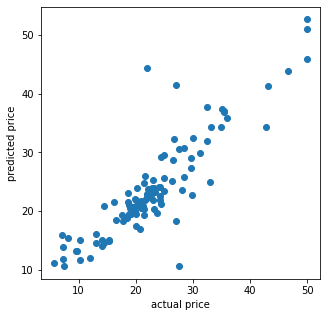

In [ ]:
import matplotlib.pylab
matplotlib.pylab.rcParams['figure.figsize']=(5,5)
plt.scatter(test_label,prediction)
plt.xlabel('actual price')
plt.ylabel('predicted price')
